# <font color=MediumVioletRed><strong>Análise e Previsões de Dados do Câncer de Mama</strong></font>

<hr>

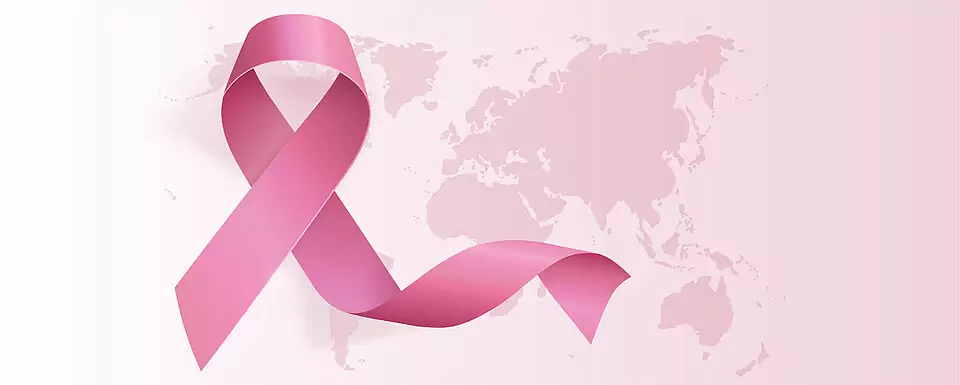

Olá visitantes,

Estou muito contente em compartilhar com vocês a "<strong>Análise e Previsões de Dados do Câncer de Mama</strong>". Este notebook é uma espécie de tutorial para os iniciantes em <strong>`Machine Learning`</strong>, e espero que seja útil para todos que desejam aprender mais sobre o assunto.

Sintam-se em casa e aproveitem a exploração dos dados e das previsões relacionadas ao câncer de mama!

###  <font color=MediumVioletRed><strong>Câncer de Mama</strong></font>

O câncer de mama é câncer que se forma nas células das mamas. <p> Surge nas células de revestimento (`epitélio`) dos ductos (`85%`) ou lóbulos (`15%`) no tecido glandular da mama. Inicialmente, o crescimento cancerígeno está confinado ao duto ou lóbulo ("in situ"), onde geralmente não causa sintomas e tem potencial mínimo de propagação (`metástase`). <br>
    
A maioria dos tipos de câncer de mama é fácil de diagnosticar por análise microscópica de uma amostra - ou biópsia - da área afetada da mama. Além disso, existem tipos de câncer de mama que requerem exames de laboratório especializados.

### <font color=MediumVioletRed><strong>Sobre o Conjunto de Dados e Suas Características</strong></font>

* Os conjuntos de dados de câncer de mama estão disponíveis no Repositório de <strong>`Machine Learning`</strong> da UCI mantido pela <strong>Universidade da Califórnia, Irvine</strong>.
* O conjunto de dados contém 569 amostras de células tumorais malignas e benignas.

* As duas primeiras colunas do conjunto de dados armazenam os números de ID exclusivos das amostras e o diagnóstico correspondente (M = `maligno`, b = `benigno`), respectivamente.
* As colunas 3-32 contêm 30 recursos de valor real que foram calculados a partir de imagens digitalizadas dos núcleos celulares, que podem ser usados para construir um modelo para prever se um tumor é benigno ou maligno.

    * 1 = maligno (`canceroso`) - ( M )
    * 0 = benigno (`não canceroso`) - ( B )     

#### <font color=MediumVioletRed><strong>Características Básicas do Tumor</strong></font>

- `diagnosis`: Esta característica indica se o tumor é benigno (B) ou maligno (M). É o alvo que os modelos de aprendizado de máquina tentam prever.
- `radius_mean`: Medida média do raio do tumor.
- `texture_mean`: Medida média da rugosidade da superfície do tumor.
- `perimeter_mean`: Medida média do contorno do tumor.
- `area_mean`: Medida média da área ocupada pelo tumor.
- `smoothness_mean`: Medida média da uniformidade da superfície do tumor.
- `compactness_mean`: Medida média da compacidade do tumor.
- `concavity_mean`: Medida média da concavidade do tumor.
- `concave points_mean`: Número médio de pontos côncavos no contorno do tumor.

#### <font color=MediumVioletRed><strong>Características nucleares do Tumor</strong></font>

- `texture_worst`: Medida da rugosidade da superfície do tumor, considerando a pior região.
- `perimeter_worst`: Medida do contorno do tumor, considerando a pior região.
- `area_worst`: Medida da área ocupada pelo tumor, considerando a pior região.
- `smoothness_worst`: Medida da uniformidade da superfície do tumor, considerando a pior região.
- `compactness_worst`: Medida da compacidade do tumor, considerando a pior região.
- `concavity_worst`: Medida da concavidade do tumor, considerando a pior região.
- `concave points_worst`: Número de pontos côncavos no contorno do tumor, considerando a pior região.
- `symmetry_worst`: Medida da simetria do tumor, considerando a pior região.
- `fractal_dimension_worst`: Medida da complexidade da forma do tumor, considerando a pior região.

#### Observações:

"`mean`" e "`worst`" indicam se a característica se refere a um valor médio calculado em todo o tumor ou ao valor máximo encontrado em qualquer região do tumor.
Essas características são medidas complexas derivadas de imagens de cortes histológicos de tumores de mama.
Interpretar cada característica individualmente pode ser difícil, mas elas são usadas em conjunto por modelos de aprendizado de máquina para prever o diagnóstico.

13 é o raio SE, o campo 23 é o pior raio.

    * Todos os valores dos recursos são recodificados com quatro dígitos significativos.

    * Valores de atributo ausentes: nenhum

> Distribuição de classe: 357 `Benigno`, 212 `Maligno`

<hr>

# <font color=MediumVioletRed><strong>1. Importar os Dados</strong></font>

### <strong>1.1. Importar os pacotes necessários</strong>

No código a seguir, está sendo realizado um processo de análise de dados e construção de modelos de aprendizado de máquina para classificação. Primeiramente, são importadas as bibliotecas necessárias, como **`pandas`** para manipulação de dados, **`numpy`** para operações matemáticas, **`shap`** para explicabilidade de modelos, **`matplotlib`** e **`seaborn`** para visualização, e **`xgboost`** para o algoritmo de boosting utilizado. Além disso, há a importação de diversos modelos de classificação do **`scikit-learn`**, como **`RandomForestClassifier`**, **`GradientBoostingClassifier`**, **`AdaBoostClassifier`**, entre outros. Em seguida, é feita a configuração para ignorar avisos, visando uma execução mais limpa do código. Após isso, é definido o ambiente de visualização para exibir os gráficos diretamente no notebook. Este script também pode envolver etapas como divisão dos dados em conjuntos de treinamento e teste (**`train_test_split`**), padronização das features (**`StandardScaler`**) e aplicação de diferentes algoritmos de classificação, como regressão logística (**`LogisticRegression`**), k-vizinhos mais próximos (**`KNeighborsClassifier`**), máquinas de vetores de suporte (**`SVC`**) e árvores de decisão (**`DecisionTreeClassifier`**). Ao final, o código está preparado para avaliar a performance dos modelos gerados por meio de métricas como relatório de classificação (**`classification_report`**), acurácia (**`accuracy_score`**) e matriz de confusão (**`confusion_matrix`**).

In [28]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import xgboost as xgb
import warnings

from keras.layers import Dense
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Ignorar avisos
warnings.filterwarnings("ignore")

# Configurações para visualização
%matplotlib inline

### <strong>1.2. Carregar o conjunto de dados com `Pandas`</strong>

No código a seguir, está sendo realizado a leitura de um conjunto de dados a partir de um arquivo CSV utilizando a biblioteca **pandas**. A função **`read_csv`** é utilizada para ler o arquivo "data.csv" localizado na pasta "input". O conteúdo do arquivo é então armazenado na variável **dataset** para posterior manipulação e análise dentro do ambiente Python.

In [2]:
dataset = pd.read_csv("input/data.csv", header=0)

### <strong>1.3. Visualizar o conjunto de dados</strong>

No código a seguir, está sendo utilizado o método **`head`** no objeto **dataset** para exibir as primeiras 10 linhas do conjunto de dados. Essa função é parte da biblioteca **pandas** em Python, comumente utilizada para manipulação e análise de dados. O comando **head** é útil para visualizar rapidamente uma amostra dos dados e entender sua estrutura e conteúdo.

In [3]:
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


No código a seguir, está sendo utilizado o método **`tail`** para exibir as últimas 10 linhas do **dataset**. Esse método é comumente utilizado em **pandas**, uma biblioteca de análise de dados em Python, para visualizar uma porção específica do conjunto de dados. Aqui, dataset representa o conjunto de dados em questão, e **`tail`** é a função que retorna as últimas linhas, neste caso, as 10 últimas, para análise ou verificação rápida.

In [4]:
dataset.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


# <font color=MediumVioletRed><strong>2. Análse Exploratório dos Dados</strong></font>

### <strong>2.1. Exibir as dimensões do conjunto de dados</strong>

No código a seguir, está sendo exibido as dimensões de um DataFrame, onde a **função** `shape` retorna uma tupla com o número de linhas e colunas do conjunto de dados. O método `format` é utilizado para formatar a saída, mostrando o número de linhas e colunas do DataFrame por meio das **variáveis** **bold** `dataset.shape[0]` e `dataset.shape[1]`, respectivamente. As mensagens impressas informam as dimensões do DataFrame, destacando o número de linhas e colunas.

In [5]:
print("Dimensões do DataFrame:")
print("-" * 25)
print("Linhas: \t {}".format(dataset.shape[0]))
print("Colunas:\t {}".format(dataset.shape[1]))

Dimensões do DataFrame:
-------------------------
Linhas: 	 569
Colunas:	 33


### <strong>2.2. Exibir as informações do conjunto de dados</strong>

No código a seguir, está sendo utilizado o método **`info`()** do objeto **dataset**, o qual fornece um resumo conciso sobre o conjunto de dados, incluindo informações sobre o número de entradas não nulas em cada coluna, o tipo de dados de cada coluna e o uso de memória pelo dataset. Esse método é útil para entender rapidamente a estrutura e o conteúdo do dataset durante a análise de dados em Python.

In [6]:
print("Informações acerca do dataset")
print("-" * 50)
dataset.info()

Informações acerca do dataset
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13 

#### <font color=Green><strong>Observações Analíticas</strong></font>

* Somente a coluna '`diagnóstico`', que precisamos prever é do tipo de dados do objeto.
* Existe apenas uma coluna de identificação do tipo **`int`**. Provavelmente vamos abandoná-lo de qualquer maneira.
* Há um total de 31 colunas que são do **`Float`** Datatype.

### <strong>2.3. Remover colunas desnecessárias</strong>

No código a seguir, está sendo criada uma lista **columns_to_remove** que contém os nomes das colunas a serem removidas do conjunto de dados. Em seguida, a função **`drop`** é utilizada para remover as colunas especificadas pela lista **columns_to_remove** do conjunto de dados, e o parâmetro **inplace=True** indica que as alterações devem ser feitas diretamente no conjunto de dados original, em vez de retornar uma cópia modificada.

In [7]:
columns_to_remove = ["Unnamed: 32", "id"]
dataset.drop(columns=columns_to_remove, inplace=True)

### <strong>2.4. Visualizar os nomes da coluna</strong>

No código a seguir, está sendo utilizada a função **`columns`** no objeto **dataset**, que retorna uma lista contendo os nomes das colunas do conjunto de dados. Essa função é comumente usada em análises de dados para obter uma visão geral das variáveis presentes no conjunto de dados, facilitando a manipulação e a visualização dos dados durante o processo de análise e modelagem.

In [8]:
dataset.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### <strong>2.5. Calcular a quantidade de valores nulos em cada coluna</strong>

No código a seguir, está sendo utilizado o método **`isnull`()** do objeto **dataset** para identificar valores nulos em um conjunto de dados. Em seguida, o método **`sum`()** é aplicado para calcular a soma desses valores nulos em cada coluna do dataset. Essa linha de código é útil para realizar uma análise inicial da quantidade de valores ausentes em cada variável do conjunto de dados, o que é crucial no processo de pré-processamento e limpeza de dados em análises de dados ou modelagem estatística.

In [9]:
dataset.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### <strong>2.6. Fornecer estatísticas descritivas sobre o conjunto de dados</strong>

No código a seguir, está sendo utilizado o método **`describe`()** em um objeto chamado **dataset**. Esse método é parte da biblioteca **pandas** e fornece estatísticas descritivas sobre o conjunto de dados, como média, desvio padrão, valores mínimo e máximo, quartis, entre outros. Ele é comumente utilizado para uma rápida análise exploratória dos dados, permitindo uma visão geral das características numéricas do conjunto de dados.

In [10]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 2.7. <strong>Fornecer a frequência de valores de uma coluna</strong>

No código a seguir, está sendo utilizado o método **`value_counts`()** em um dataset para contar a frequência de valores na coluna **diagnosis**. Este método é aplicado em um objeto do tipo DataFrame do Pandas, uma **biblioteca** amplamente utilizada para manipulação e análise de dados em Python. O **`value_counts`()** retorna uma série contendo contagens de observações únicas, onde cada valor único na coluna é contado separadamente. Portanto, o resultado será um conjunto de contagens para cada diagnóstico presente no dataset, fornecendo uma visão geral da distribuição dos diagnósticos dentro dos dados.

In [11]:
dataset.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

### 2.8. <strong>Fornecer a frequência de valores de cada tipo de dados</strong>

No código a seguir, está sendo utilizada a função **`value_counts`()** da biblioteca **pandas** em um DataFrame chamado **dataset**, que conta a quantidade de ocorrências de cada tipo de dado (**`dtypes`**) presentes nas colunas do conjunto de dados. Essa função retorna uma série contendo os contadores de cada tipo de dado, organizados de forma decrescente em relação à frequência de ocorrência.

In [12]:
dataset.dtypes.value_counts()

float64    30
object      1
dtype: int64

### 2.9. <strong>Verificar a cardinalidade dos dados</strong>

No código a seguir, está sendo calculada a contagem de valores únicos em cada coluna do conjunto de dados, utilizando o método **`nunique`()** da biblioteca pandas. Os resultados são então ordenados em ordem decrescente, conforme especificado pela função **`sort_values`(ascending=False)**. Esse trecho de código pode ser útil para identificar a distribuição de valores distintos em um conjunto de dados e entender a diversidade dos dados em cada coluna.

In [13]:
dataset.nunique().sort_values(ascending=False)

smoothness_se              547
fractal_dimension_se       545
area_worst                 544
concave points_mean        542
compactness_se             541
radius_se                  540
concavity_worst            539
area_mean                  539
compactness_mean           537
concavity_mean             537
fractal_dimension_worst    535
perimeter_se               533
concavity_se               533
compactness_worst          529
area_se                    528
perimeter_mean             522
texture_se                 519
perimeter_worst            514
texture_worst              511
concave points_se          507
symmetry_worst             500
fractal_dimension_mean     499
symmetry_se                498
concave points_worst       492
texture_mean               479
smoothness_mean            474
radius_worst               457
radius_mean                456
symmetry_mean              432
smoothness_worst           411
diagnosis                    2
dtype: int64

# <font color=MediumVioletRed><strong>3. Análise e Visualização Gráfica dos Dados</strong></font>

### 3.1. <strong>Visualizar um histograma da base de dados com o módulo `Plotly Express`</strong>

No código a seguir, está sendo criado um histograma utilizando a biblioteca **Plotly Express**. A função **`px.histogram`** é utilizada para plotar o histograma, onde o conjunto de dados é representado pelo parâmetro **dataset** e a variável a ser analisada é especificada pelo parâmetro **x='diagnosis'**. A cor do histograma é definida pela variável **diagnosis** e o título do gráfico é 'Contagem dos Resultados por Diagnóstico'. O parâmetro **text_auto=True** permite a exibição automática de texto informativo nos bins do histograma. O resultado final é exibido através da chamada **histogram_diagnosis**.

In [14]:
histogram_diagnosis = px.histogram(dataset, x='diagnosis', color='diagnosis', title='Contagem dos Resultados por Diagnóstico', text_auto=True)
histogram_diagnosis

### 3.2. <strong>Visualizar a distribuição dos diagnósticos de câncer de mama com o módulo `pyplot`</strong>

No código a seguir, está sendo realizada uma análise da distribuição dos diagnósticos de câncer de mama em um conjunto de dados. Primeiro, a variável **pclass_counts** é criada para contar a quantidade de ocorrências de cada diagnóstico na coluna 'diagnosis' do conjunto de dados. Em seguida, é criado um gráfico de pizza com o tamanho da figura definido como 20 por 8, onde a variável **explode** é utilizada para destacar um dos segmentos do gráfico. Os dados são plotados no formato de pizza utilizando a função **`plot`** com o tipo 'pie', ajustes de fonte definidos por **fontsize**, e exibição dos percentuais com uma casa decimal utilizando a opção **autopct**. O título do gráfico é definido com a função **title**, configurando seu peso, cor e tamanho da fonte. Os rótulos dos eixos x e y são definidos respectivamente com as funções **`xlabel`** e **`ylabel`**, especificando cor, tamanho da fonte e espaçamento em relação aos rótulos. Por fim, uma legenda é adicionada com a função **`legend`**, onde os rótulos são os diferentes diagnósticos presentes e a posição é ajustada para "best". O gráfico é então exibido com a função **`show`**.

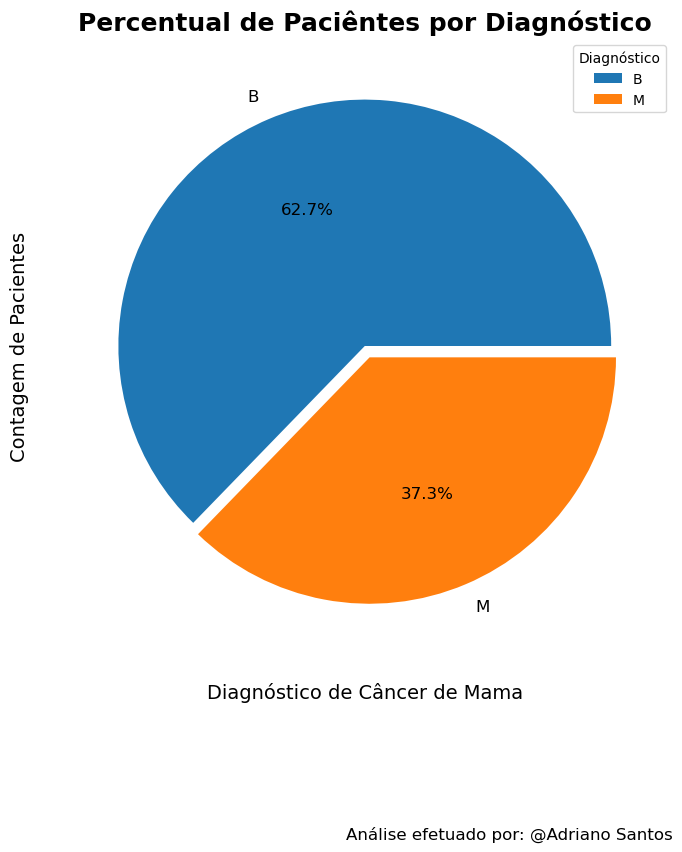

In [15]:
pclass_counts = dataset['diagnosis'].value_counts()

plt.figure(figsize=(20, 8))
explode = (0, 0.05)

pclass_counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%.1f%%')

plt.title('Percentual de Paciêntes por Diagnóstico', weight="bold", color="#000000", fontsize=18)
plt.xlabel('Diagnóstico de Câncer de Mama', color="#000000", fontsize=14, labelpad=20)
plt.ylabel('Contagem de Pacientes', color="#000000", fontsize=14, labelpad=20)
plt.legend(title='Diagnóstico', labels=pclass_counts.index, loc="best")
plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)

plt.show()

# <font color=MediumVioletRed><strong>3. Pré-processamento dos Dados</strong></font>

### 3.1. <strong>Substituir valores `'M' por 1` e `'B' por 0` na coluna 'diagnosis' do conjunto de dados</strong>

No código a seguir, está sendo realizado o tratamento de dados em um conjunto de dados representado pela variável **dataset**. Primeiramente, é feita a substituição dos valores 'M' por 1 e 'B' por 0 na coluna 'diagnosis' utilizando a função **`replace`** da biblioteca **pandas**. Em seguida, são exibidos os valores únicos na coluna 'diagnosis', após a substituição, utilizando a função **`unique`** da mesma biblioteca. Os valores resultantes são armazenados na variável **values_unicos_diagnosis** e então impressos na tela utilizando a função **`print`**. Esse código é útil para converter valores categóricos em numéricos, facilitando o processamento e análise dos dados.

In [16]:
dataset['diagnosis'] = dataset['diagnosis'].replace({"M": 1, "B": 0})

values_unicos_diagnosis = dataset['diagnosis'].unique()
print("Valores únicos na coluna 'diagnosis' após substituição:", values_unicos_diagnosis)

Valores únicos na coluna 'diagnosis' após substituição: [1 0]


#### <font color=Green><strong>Observações Analíticas</strong></font>

Para realizar nossa análise facilmente, convertemos a coluna de destino como:

* Maligno - 1
* Benigno - 0

### 3.2. <strong>Visualizar o conjunto de dados depois do processamento</strong>

No código a seguir, está sendo utilizado o método **`head`** no objeto **dataset** para exibir as primeiras 10 linhas do conjunto de dados. Essa função é parte da biblioteca **pandas** em Python, comumente utilizada para manipulação e análise de dados. O comando **head** é útil para visualizar rapidamente uma amostra dos dados e entender sua estrutura e conteúdo.

In [17]:
dataset.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


### 3.3. <strong>Visualizar e apresentar os dados estatísticos</strong>

No código a seguir, está sendo utilizada a função **`round`** para arredondar os valores estatísticos gerados pelo método **`describe`()** do **dataset** para duas casas decimais. Essa função ajuda a melhorar a legibilidade e apresentação dos dados estatísticos, facilitando sua análise e interpretação.

In [18]:
round(dataset.describe(), 2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


### 3.4. <strong>Exibir as informações do conjunto de dados depois do processamento</strong>

In [19]:
print("Informações acerca do dataset")
print("-" * 50)
dataset.info()

Informações acerca do dataset
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13 

### 3.5. <strong>Visualizar as correlações entre as variáveis em uma matriz</strong> 

No código a seguir, está sendo utilizado o método **`round`** para arredondar os valores das correlações calculadas entre as colunas do conjunto de dados (**dataset**). A função **`corr()`** é utilizada para calcular as correlações entre as variáveis do conjunto de dados. O número 3 dentro dos parênteses representa o número de casas decimais para o arredondamento dos valores de correlação. O resultado é uma `matriz de correlação` com os valores arredondados para três casas decimais.

In [20]:
round(dataset.corr(), 3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000,0.730,0.415,0.743,0.709,0.359,0.597,0.696,0.777,0.330,...,0.776,0.457,0.783,0.734,0.421,0.591,0.660,0.794,0.416,0.324
radius_mean,0.730,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
texture_mean,0.415,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
perimeter_mean,0.743,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
area_mean,0.709,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
smoothness_mean,0.359,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
compactness_mean,0.597,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
concavity_mean,0.696,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
concave points_mean,0.777,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
symmetry_mean,0.330,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438


# <font color=MediumVioletRed><strong>4. Visualização Gráfica Pós-processado</strong></font>

### 4.1. <strong>Visualizar as correlações entre as variáveis em uma gráfico da função `heatmap`</strong> 

No código a seguir, está sendo definida uma função **`plot_heatmap_correlation`** que recebe um conjunto de dados (**dataset**). Dentro da função, é criado um gráfico de calor utilizando a biblioteca **seaborn** para visualizar as correlações entre as variáveis do conjunto de dados. A função **`heatmap`** da biblioteca **seaborn** é utilizada para plotar o gráfico, com a opção **annot=True** para exibir os valores das correlações nos quadrados do gráfico, **linewidths=.5** para definir a largura das linhas entre os quadrados, e **cmap="Purples"** para escolher uma paleta de cores roxas. Em seguida, são configurados o título do gráfico com a função **`title`**, e uma anotação com o nome do analista responsável pela análise, utilizando a função **annotate**. Por fim, o gráfico é exibido com a função **`show`**.

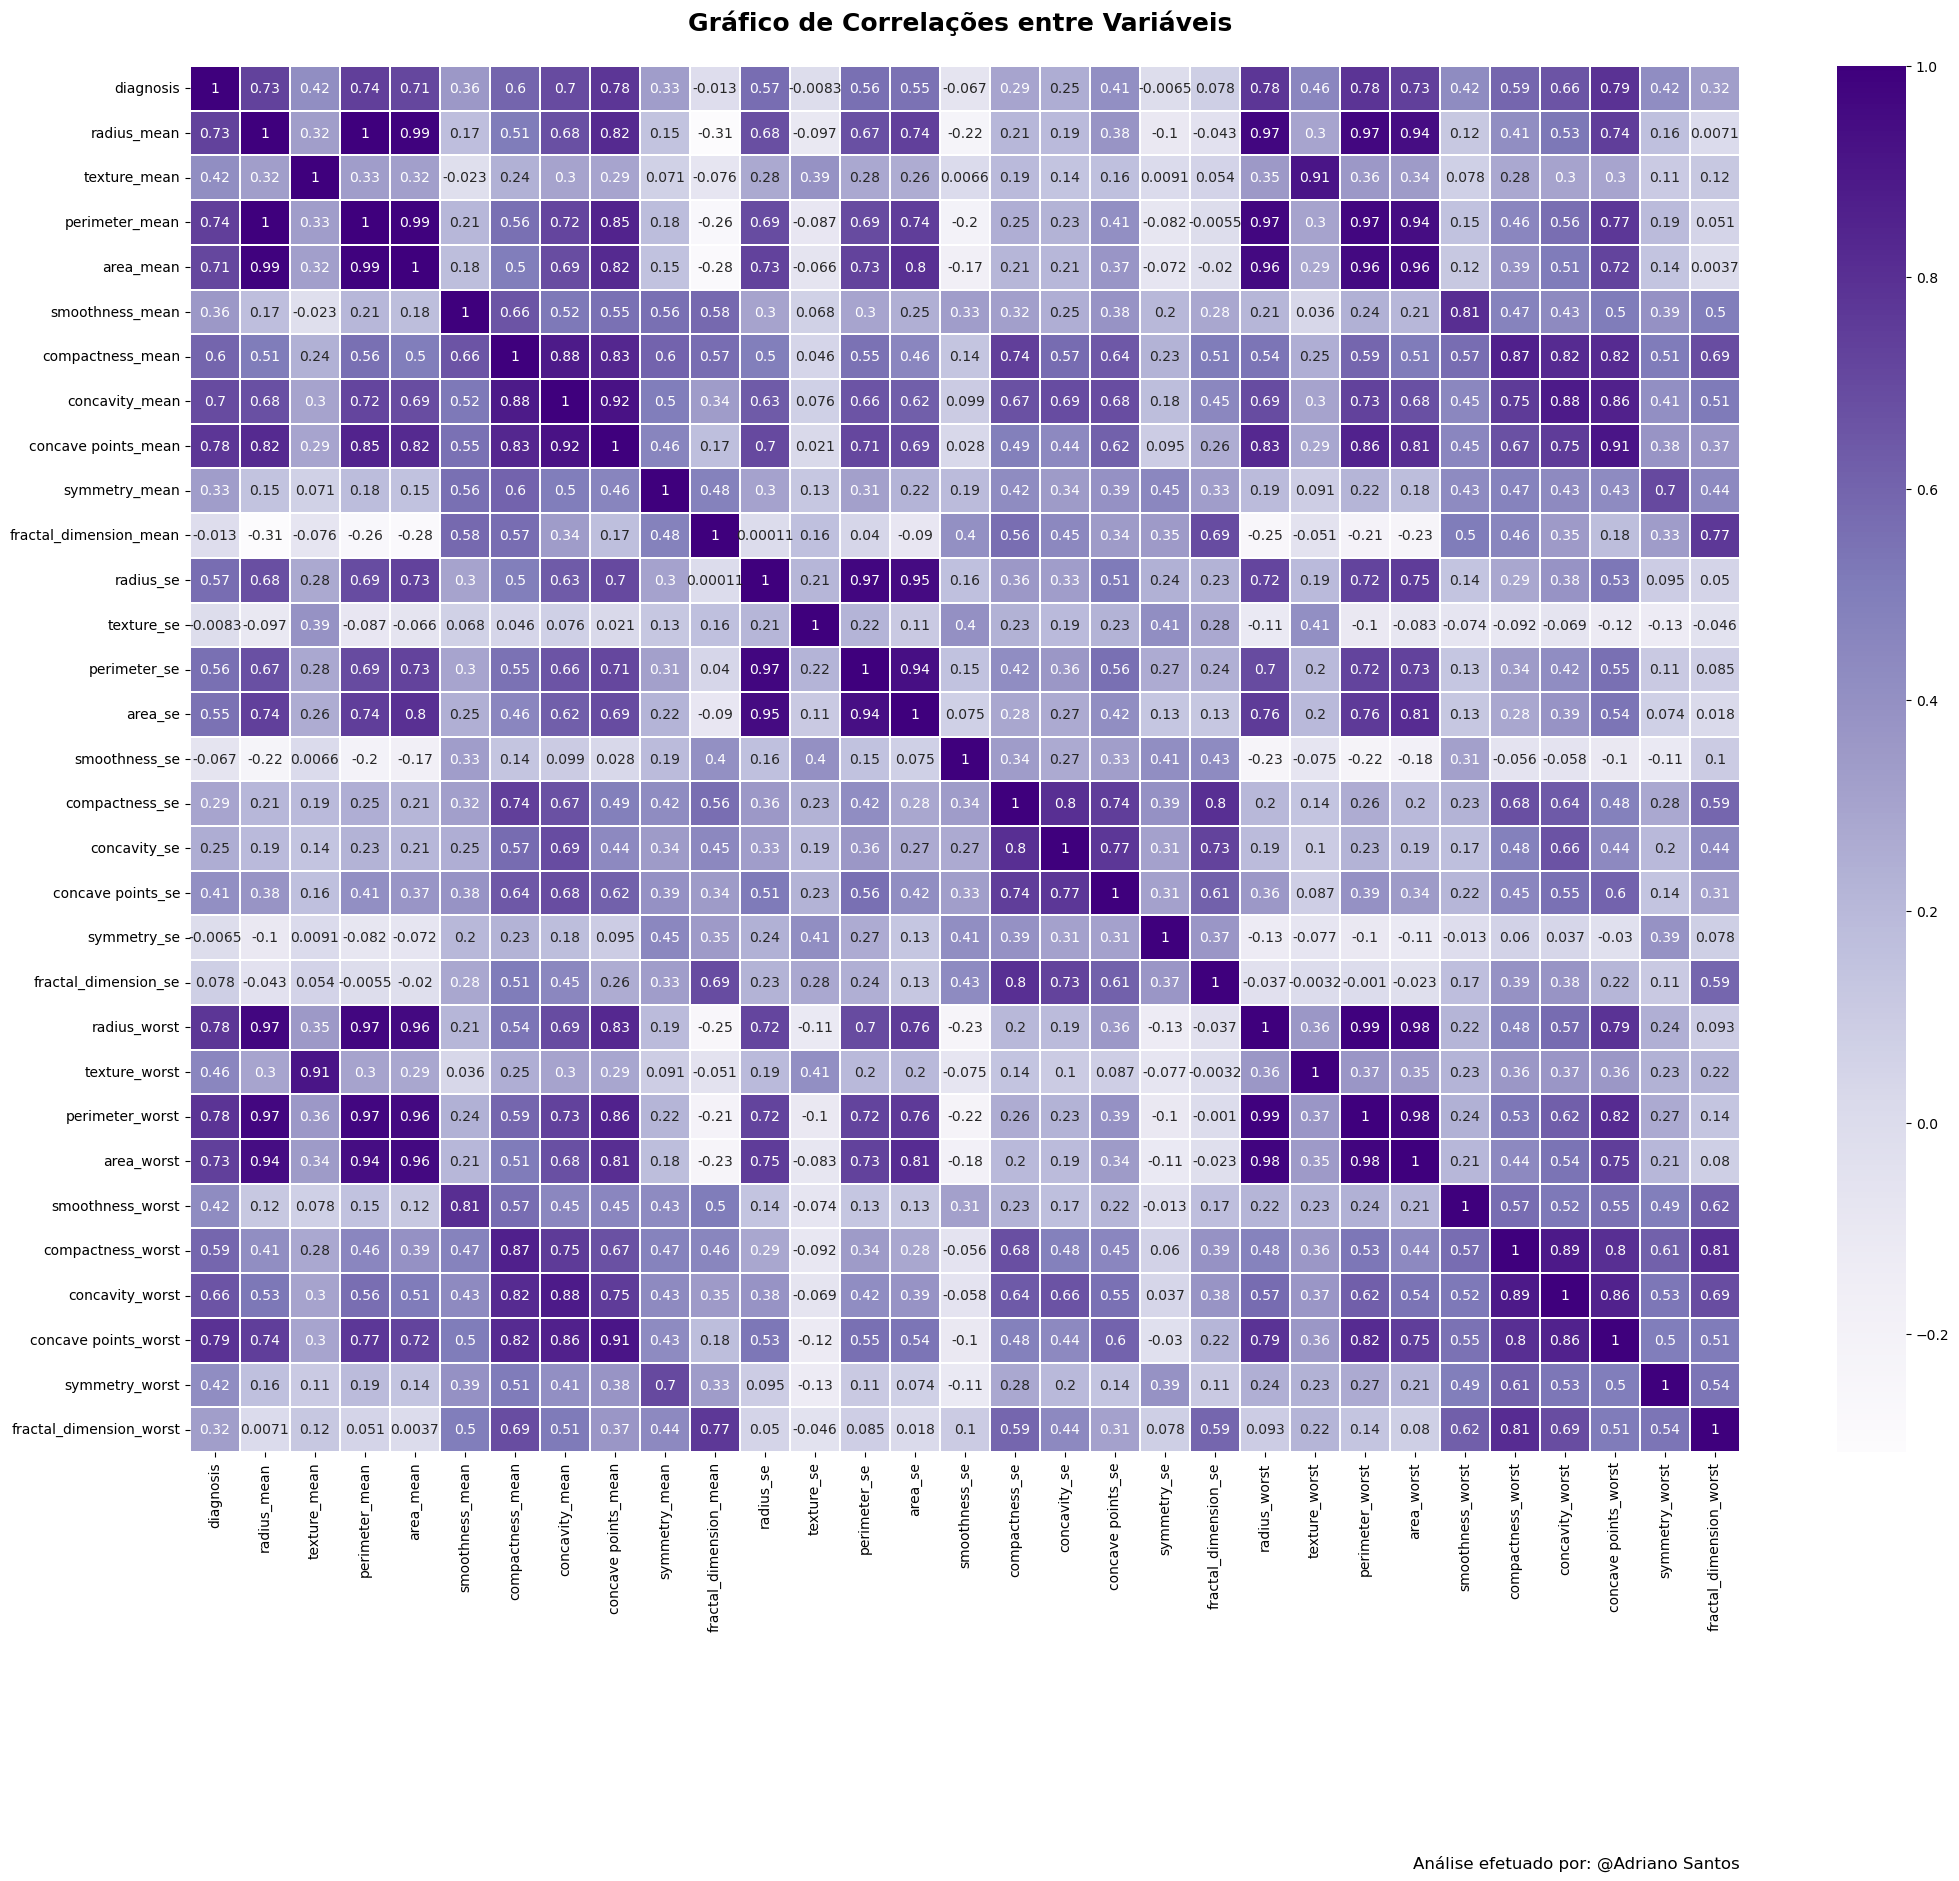

In [21]:
dataset_corr = dataset.corr()

def plot_heatmap_correlation(dataset):
    plt.figure(figsize=(25, 18))
    sns.heatmap(dataset.corr(), annot=True, linewidths=.2, cmap="Purples")
    plt.title('Gráfico de Correlações entre Variáveis \n', weight="bold", color="#000000", fontsize=18)
    plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
    plt.show()


plot_heatmap_correlation(dataset)

#### <font color=Green><strong>Observações Analíticas</strong></font>

Do mapa de calor, podemos observar dos mapas de calor que existem muitas correlações negativas nesse conjunto de dados.

### 4.2. <strong>Filtrar os índices das correlações cujo valor absoluto do diagnóstico é maior que `0.59`</strong>

No código a seguir, está sendo utilizado um filtro para selecionar os índices das correlações no conjunto de dados. A condição especificada verifica se o valor absoluto da coluna **diagnosis** é maior que 0.59. Para isso, utiliza-se a função **`abs()`** para obter o valor absoluto dos elementos da coluna. Em seguida, a expressão **dataset_corr['diagnosis'] > 0.59** retorna uma série booleana indicando quais linhas satisfazem essa condição. Por fim, **dataset_corr[...]** seleciona apenas os índices das linhas que atendem à condição estabelecida, retornando um conjunto de índ

In [22]:
dataset_corr[abs(dataset_corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

### 4.3. <strong>Visualizar as Maiores Correlações entre as Características do Dataset</strong>

No código a seguir, está sendo realizada uma análise de correlação entre as características do dataset e o diagnóstico, utilizando a linguagem de programação Python. Inicialmente, a coluna 'diagnosis' é removida do conjunto de dados, gerando um novo conjunto denominado **features**. Em seguida, é calculada a correlação entre essas características e o diagnóstico, armazenada na variável **correlation_with_diagnosis**, por meio da função **`corrwith`**. Posteriormente, é plotado um gráfico de barras representando essa correlação, utilizando a função **`plot`**, com parâmetros específicos como tipo de gráfico, grade, tamanho da figura e título. Além disso, há uma anotação no gráfico indicando a autoria da análise. Por fim, o gráfico é exibido na tela. É importante ressaltar que, para o correto funcionamento do código, é necessária a utilização da biblioteca **matplotlib.pyplot** para a geração do gráfico.

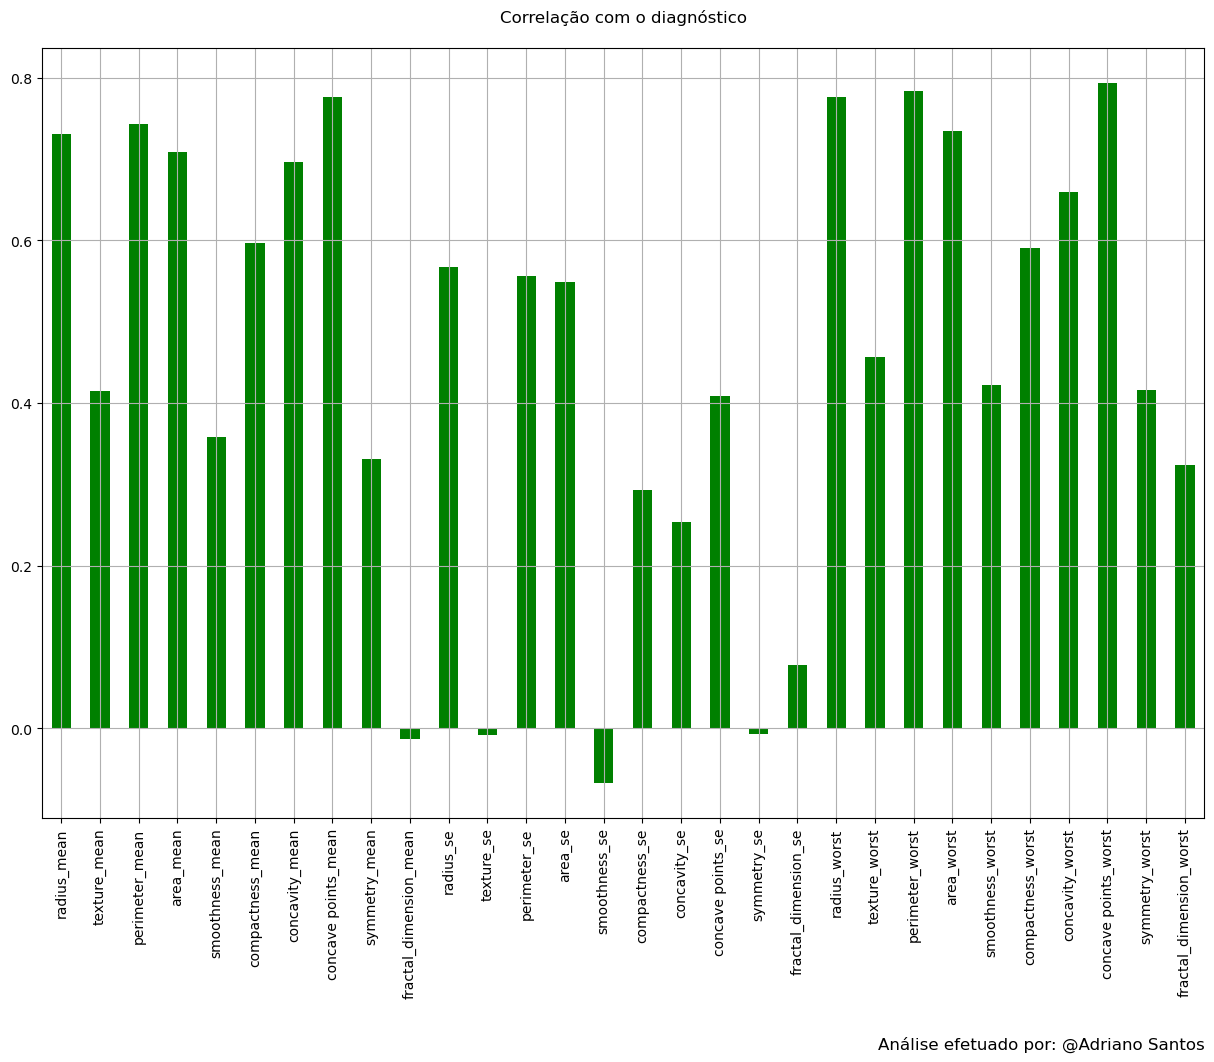

In [23]:
features = dataset.drop('diagnosis', axis=1)

correlation_with_diagnosis = features.corrwith(dataset['diagnosis'])
correlation_with_diagnosis.plot(kind='bar', grid=True, figsize=(15, 10), title="Correlação com o diagnóstico\n", color="green")
plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)

plt.show()

#### <font color=Green><strong>Observações Analíticas</strong></font>

As colunas acima, são as que mostram a maior correlação com nossa coluna de diagnóstico. Há duas coisas que podem ser feitas.
- Podemos usar apenas as colunas com maior correlação, ou podemos continuar usando todas as colunas.
- Estarei usando todas essas colunas para prever nosso resultado
- Você pode eliminar alguns e ver se a precisão melhora!
- Existem apenas um punhado de colunas que mostram correlação negativa com a '`coluna de diagnóstico`'
- Cerca de metade de nossas colunas está mais de 50% correlacionadas positivamente com a coluna de diagnóstico.

Temos que selecionar quais dos atributos queremos usar na construção de nosso modelo!

### 4.4. <strong>Visualizar as correlações entre as variáveis acima de 0,60 em uma gráfico da função `heatmap`</strong> 

No código a seguir, está sendo calculada a matriz de correlação utilizando a função **`corr()`** do conjunto de dados fornecido. Em seguida, é definido um limite de correlação (**threshold**) em 0,60. Com isso, é criado um filtro para identificar as características do conjunto de dados que possuem correlação absoluta com a variável alvo (**diagnosis**) maior que esse limite, utilizando a função **`np.abs()`**. As características que atendem a esse critério são armazenadas na lista **corr_features**. Posteriormente, é gerado um mapa de calor utilizando a biblioteca **sns** (Seaborn), representando a correlação entre essas características selecionadas, com anotações dos valores de correlação ativadas através do parâmetro **annot=True**. O mapa de calor é exibido com a função **`plt.show()`**, e é adicionado um título destacado em negrito com a função **`plt.title()`**. Além disso, uma anotação é inserida no gráfico indicando a análise realizada por "@Adriano Santos".

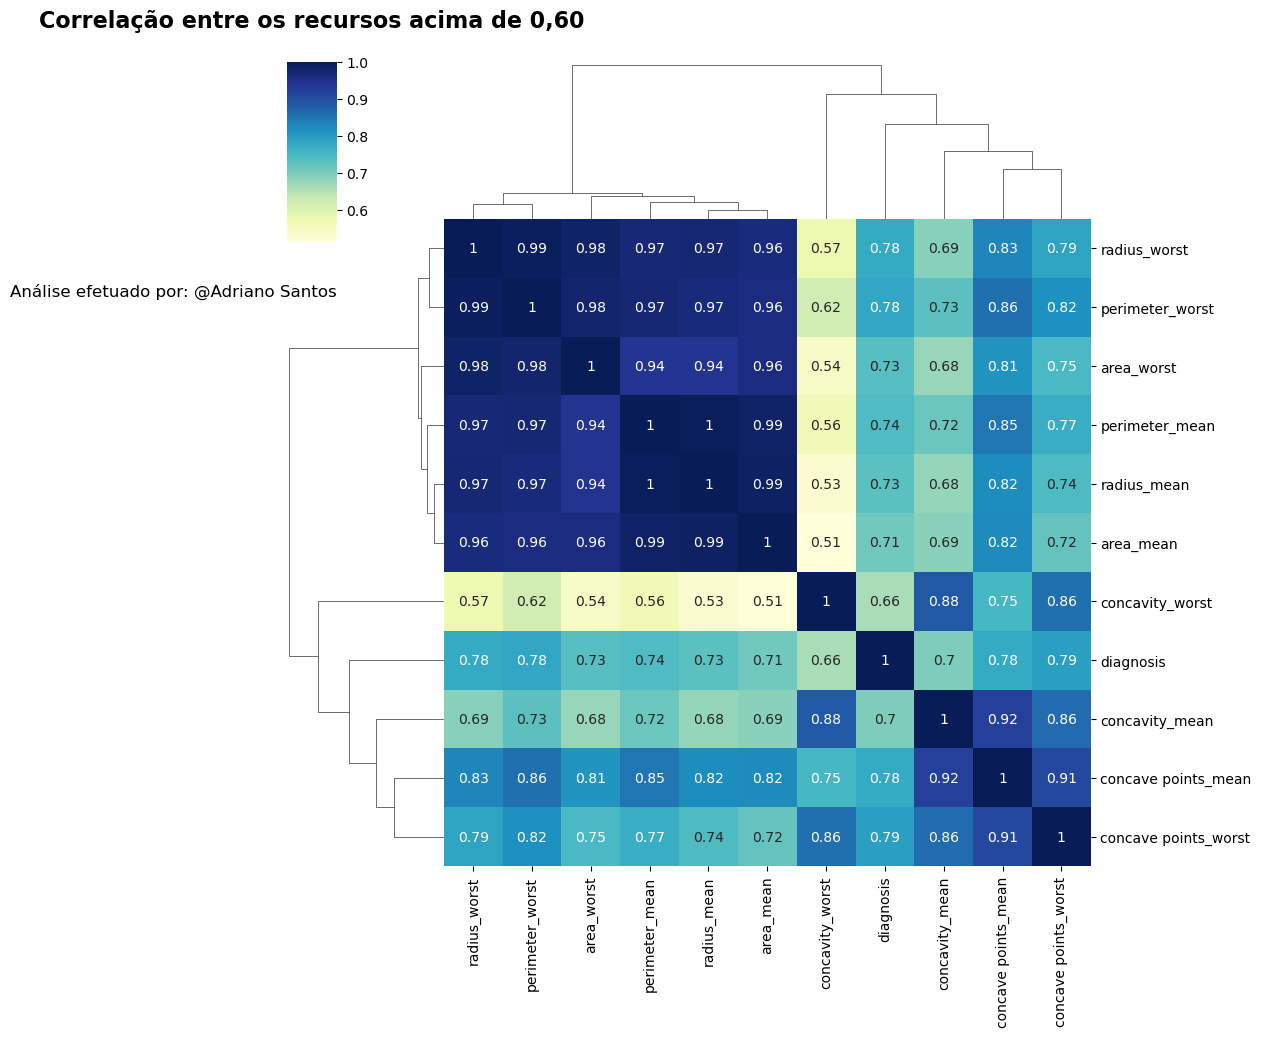

In [24]:
corr_matrix = dataset.corr()

threshold = 0.60 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(dataset[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlação entre os recursos acima de 0,60\n", fontweight = "bold", fontsize=16)
plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)

plt.show()

### 4.5. <strong>Visualizar as correlações entre as variáveis processadas em uma gráfico da função `heatmap`</strong> 

No código a seguir, está sendo calculada a matriz de correlação (**corr**) entre as características (**corr_features**) do conjunto de dados (**dataset**). Em seguida, é gerado um gráfico de calor (**heatmap**) utilizando a biblioteca **seaborn** para visualizar as correlações entre as variáveis. O tamanho do gráfico é ajustado para 14x14 polegadas e é adicionada uma barra de cores (**cbar**) para representar os valores da correlação. As células do gráfico são anotadas com os valores de correlação (**annot=True**) e formatadas com duas casas decimais (**fmt='.2f'**). As anotações são configuradas para ter um tamanho de fonte de 15 (**annot_kws={'size': 15}**) e são exibidos os rótulos das características nas margens do gráfico. O mapa de cores utilizado é o '**coolwarm**' para representar valores positivos e negativos. Por fim, é adicionada uma nota ao gráfico indicando a autoria da análise, no caso, '`@Adriano Santos`'.

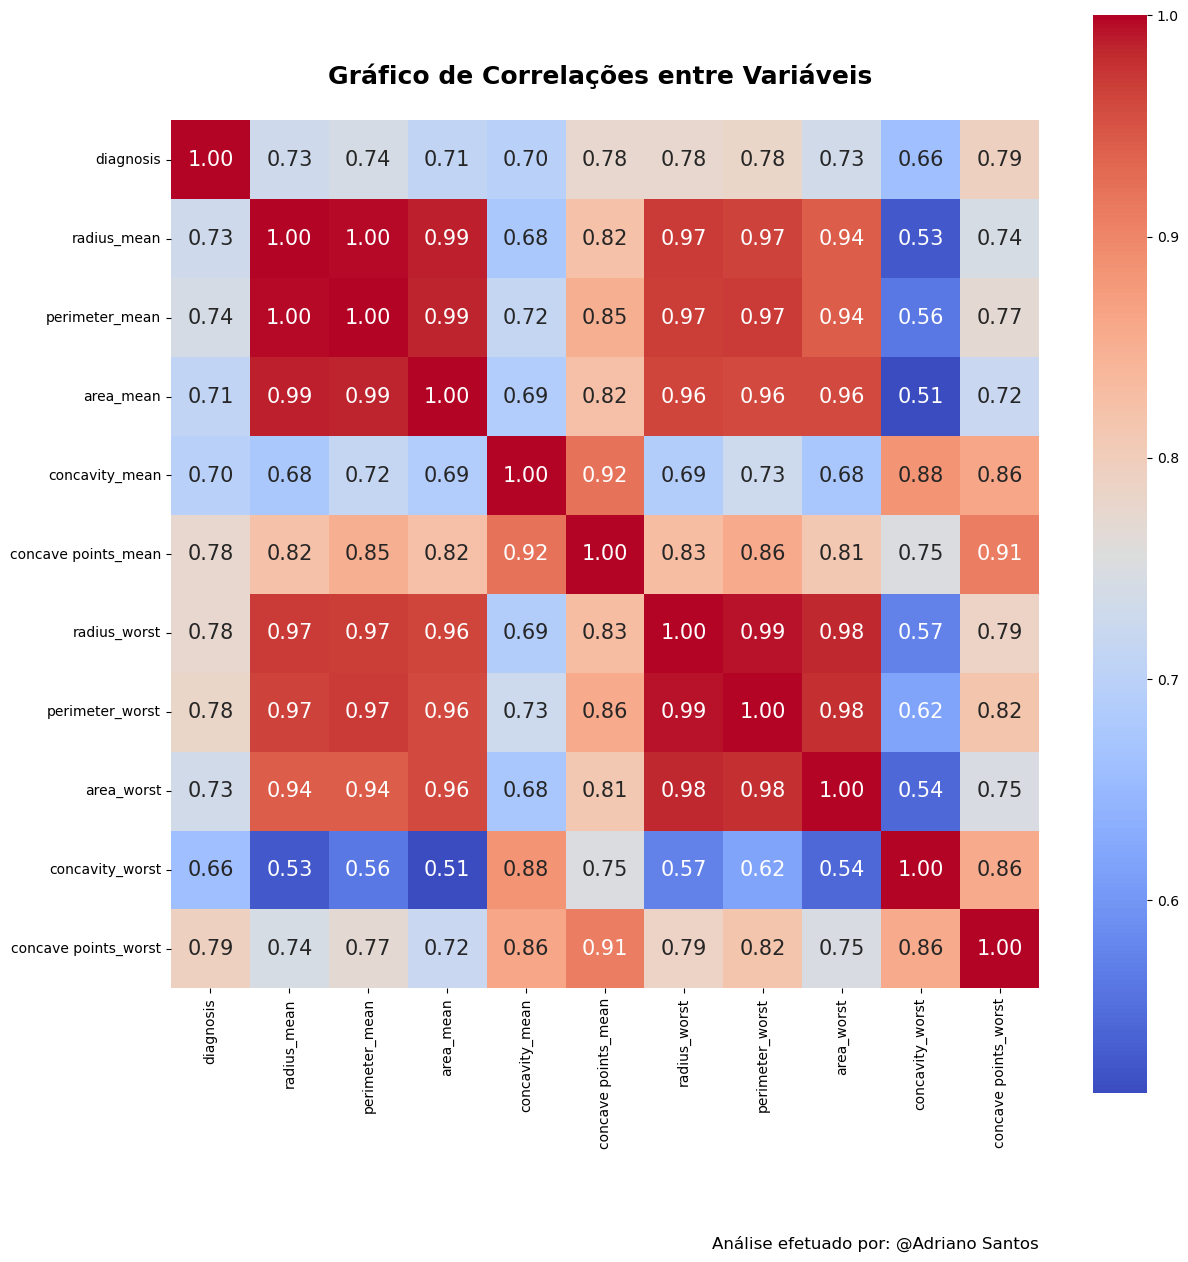

In [33]:
corr_dataset = dataset[corr_features].corr() 

plt.figure(figsize=(14,14))
sns.heatmap(corr_dataset, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, xticklabels= corr_features, yticklabels= corr_features, cmap= 'coolwarm') 
plt.title('Gráfico de Correlações entre Variáveis \n', weight="bold", color="#000000", fontsize=18)
plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)

plt.show()

### 4.6. <strong>Visualizar Gráfico de dispersão em pares das características do conjunto de dados</strong>

No código a seguir, está sendo utilizado o método **`pairplot`** da biblioteca **sns** (Seaborn) para criar um gráfico de dispersão em pares das características do conjunto de dados. A função **`pairplot`** aceita diversos parâmetros, incluindo o conjunto de dados a ser plotado (**dataset**), as características correlacionadas (**corr_features**), o estilo do histograma na diagonal (**diag_kind**), os marcadores utilizados nos pontos de dispersão (**markers**), a variável que define a cor dos pontos de acordo com uma categoria (**hue**), e a paleta de cores a ser utilizada (**palette**). Além disso, a função **`annotate`** é utilizada para adicionar uma anotação ao gráfico, indicando a autoria da análise. Por fim, a função **`show`** é chamada para exibir o gráfico resultante.

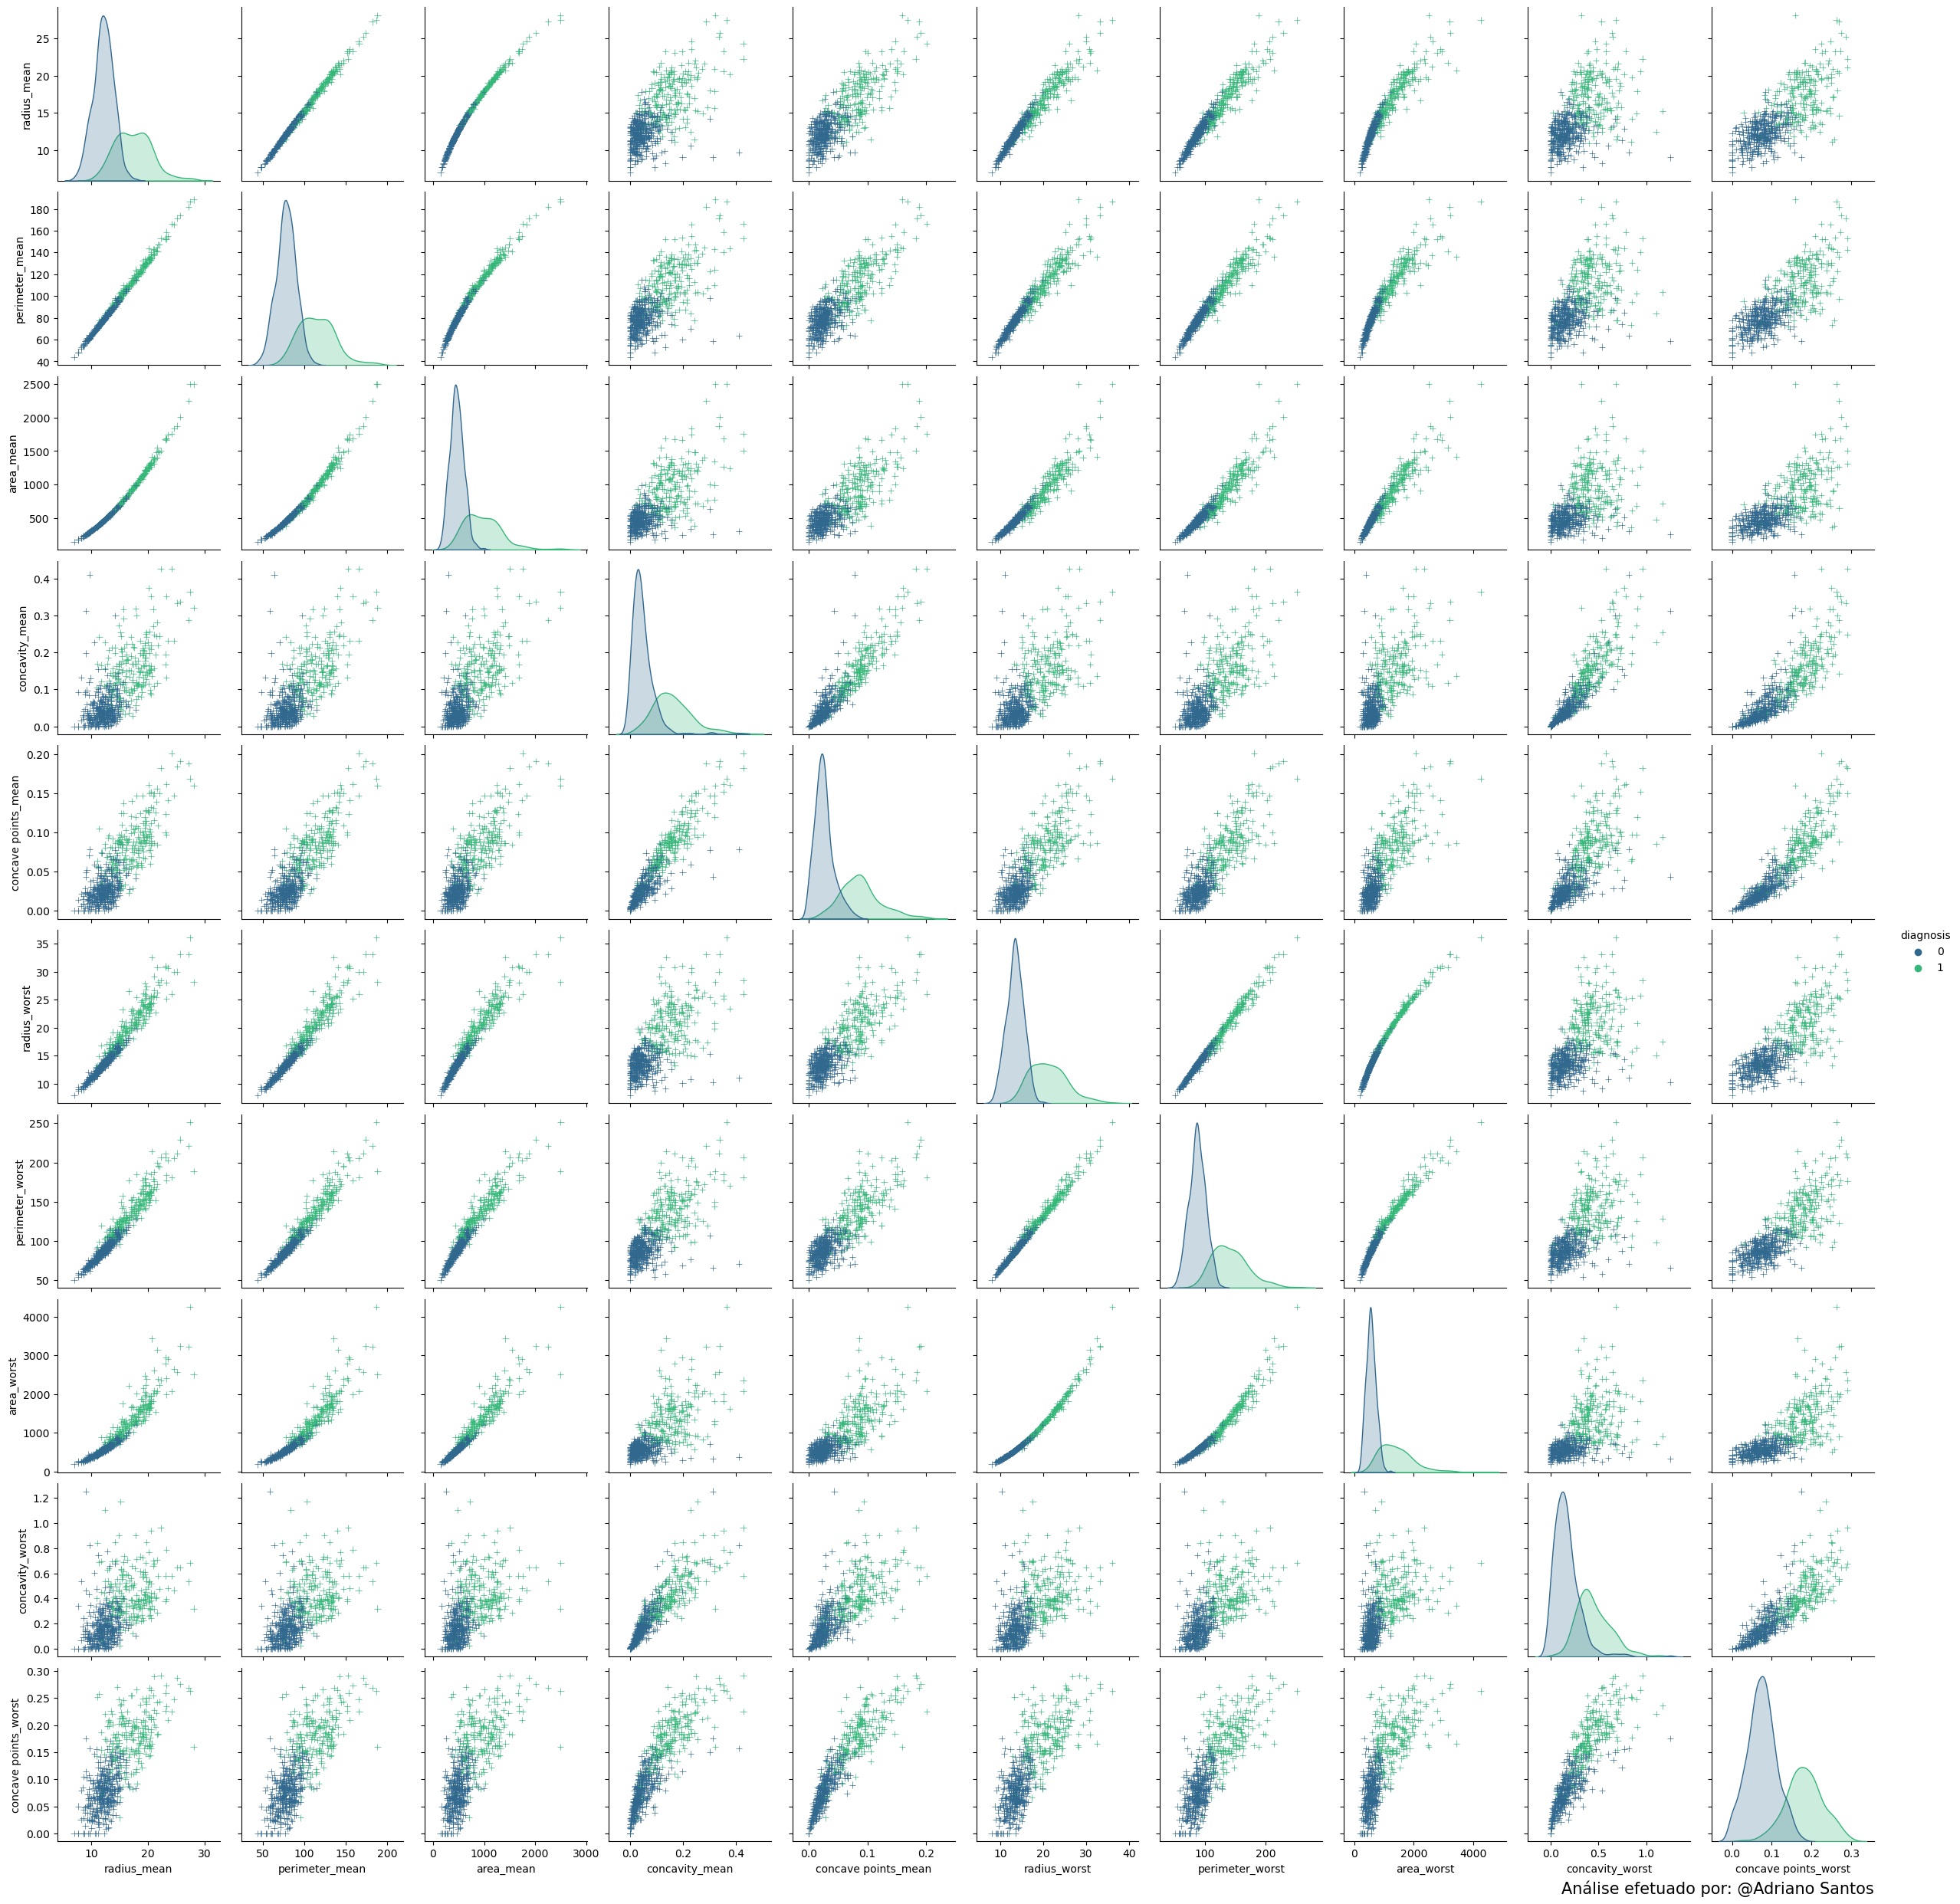

In [34]:
sns.pairplot(dataset[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=15)

plt.show()

# <font color=MediumVioletRed><strong>5. Definição dos Conjuntos de Treino e Teste</strong></font>

### 5.1. <strong>Definindo os Conjuntos de treino e teste</strong>

No código a seguir, está sendo definido os conjuntos de treino e teste para um modelo de aprendizado de máquina. Primeiramente, os recursos (**x**) são definidos excluindo a coluna 'diagnosis' do conjunto de dados. Em seguida, as classes (**y**) são definidas como a coluna 'diagnosis'. A função **train_test_split** da biblioteca **sklearn** é utilizada para dividir os dados em conjuntos de treino e teste, com 80% dos dados destinados ao treino e 20% ao teste, mantendo a aleatoriedade dos dados através do parâmetro **random_state=42**. Os conjuntos resultantes são armazenados nas variáveis **x_train**, **x_test**, **y_train** e **y_test**. Por fim, são impressas as dimensões dos conjuntos de treinamento e teste, seguidas pela exibição de um gráfico, provavelmente relacionado à visualização dos dados, que não está presente no trecho fornecido.

In [58]:
x = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Dimensões do conjunto de treinamento:", x_train.shape, y_train.shape)
print("Dimensões do conjunto de validação:", x_test.shape, y_test.shape)

Dimensões do conjunto de treinamento: (455, 30) (455,)
Dimensões do conjunto de validação: (114, 30) (114,)


# <font color=MediumVioletRed><strong>6. Construção dos Modelos</strong></font>

### 6.1. <strong>Definindo a função responsável em criar gráfico de Matriz de Confusão</strong>

No código a seguir, está sendo definida a função **`plotar_matrix_confusion`**, que recebe como parâmetro uma matriz de confusão (**conf_mat**). Esta função cria um gráfico de matriz de confusão utilizando a biblioteca **matplotlib**. Primeiro, é criada uma figura e um eixo utilizando a função **`subplots`**, com um tamanho específico. Em seguida, é utilizada a função **`matshow`** para exibir a matriz de confusão como uma imagem colorida, utilizando um mapa de cores (cmap) do tipo "Blues" e uma transparência de 0.3. Depois, são iteradas sobre as células da matriz para adicionar os valores nelas com a função **`text`**. São adicionados rótulos nos eixos x e y, bem como um título para o gráfico. A função **`tight_layout`** ajusta a disposição dos elementos no gráfico para evitar sobreposições. Por fim, é adicionada uma anotação indicando a análise realizada, atribuída a @Adriano Santos, e o gráfico é exibido com a função **`show`**.

In [59]:
def plotar_matrix_confusion(conf_mat):    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.3)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(x=j, y=i, s=conf_mat[i, j], va='center', ha='center')
            
    plt.xlabel('Previsões')
    plt.ylabel('Atual')
    plt.title('Matriz de confusão')
    plt.tight_layout()
    plt.annotate('Análise efetuada por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
    
    plt.show()

### 6.2. <strong>Model Random Forests Classifier</strong>

O `RandomForestClassifier` é um algoritmo de aprendizado de máquina de classificação, que utiliza uma "floresta" de árvores de decisão para realizar previsões. Ele é um dos algoritmos mais populares e eficazes para diversos tipos de problemas de classificação, como por exemplo:

- Diagnóstico de doenças: Classificar pacientes como saudáveis ou doentes.
- Detecção de fraude: Identificar transações fraudulentas.
- Segmentação de mercado: Classificar clientes em diferentes grupos de interesse.
- Análise de risco: Prever a probabilidade de um evento inadimplente.

<strong>Como funciona o RandomForestClassifier?</strong>

- Criação de várias árvores de decisão: O algoritmo cria aleatoriamente várias árvores de decisão, cada uma com um subconjunto de dados e features.
- Treinamento das árvores: Cada árvore de decisão é treinada usando um subconjunto dos dados de treinamento.
- Combinação das previsões: As previsões de todas as árvores de decisão são combinadas para gerar uma previsão final para cada nova instância de dados.

<strong>Vantagens do RandomForestClassifier:</strong>

- Alta acurácia: O RandomForestClassifier geralmente obtém alta acurácia em problemas de classificação.
- Robustez: O algoritmo é robusto a outliers e ruído nos dados.
- Interpretabilidade: As árvores de decisão individuais podem ser interpretadas para entender como o modelo faz suas previsões.
- Versatilidade: O algoritmo pode ser aplicado a diversos tipos de problemas de classificação.

<strong>Desvantagens do RandomForestClassifier:</strong>

- Complexidade: O treinamento do RandomForestClassifier pode ser computacionalmente caro, especialmente para conjuntos de dados grandes.
- Overfitting: O algoritmo pode sofrer de overfitting se não for ajustado corretamente.
- Interpretabilidade: A interpretabilidade do modelo pode ser limitada, especialmente para modelos com muitas árvores de decisão.

### 6.3. <strong>Criando modelo de classificação</strong>

No código a seguir, está sendo utilizado o algoritmo **RandomForestClassifier** da biblioteca **scikit-learn** para criar um modelo de classificação. Este modelo é instanciado com os seguintes parâmetros: **n_estimators=1000** define o número de árvores na floresta, **n_jobs=-1** indica que o treinamento das árvores pode ser paralelizado para aproveitar todos os núcleos da CPU disponíveis, e **random_state=0** define uma semente para a geração de números aleatórios, garantindo a reprodutibilidade dos resultados. Em seguida, o método **fit** é chamado para ajustar o modelo aos dados de treinamento (**x_train** e **y_train**), onde **x_train** representa as features e **y_train** representa os rótulos correspondentes. Este processo de ajuste permite que o modelo aprenda padrões nos dados de treinamento, capacitando-o a fazer previsões precisas sobre dados não vistos.

In [60]:
model_RandomForest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
model_RandomForest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

### 6.4. <strong>Criando uma predição com o modelo previamente treinado</strong>

No código a seguir, está sendo realizada uma predição utilizando o modelo **RandomForest** previamente treinado. A função **predict** é utilizada para gerar as previsões com base nos dados de teste **x_test**, e essas previsões são atribuídas à variável **predition_1**. Em seguida, é impresso um relatório de classificação utilizando a função **classification_report**, que compara as previsões geradas com as classes reais contidas em **y_test**, fornecendo métricas como precisão, recall e F1-score para cada classe, assim como a média ponderada dessas métricas. Esse relatório é útil para avaliar o desempenho do modelo de classificação em diferentes aspectos, como a capacidade de distinguir entre diferentes classes e a sua precisão geral.

In [61]:
predition_1 = model_RandomForest.predict(x_test)
print(classification_report(y_test, predition_1))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



No código a seguir, está sendo calculada a precisão (accuracy) de um modelo de **Random Forest**. A função **`accuracy_score`** da biblioteca **sklearn.metrics** é utilizada para calcular a acurácia do modelo, comparando as previsões (**predition_1**) com os valores reais (**y_test**). O resultado é armazenado na variável **modelRandomForest_acc**. Em seguida, é exibida a acurácia do modelo no formato de porcentagem, com duas casas decimais, através da função **print**, onde o valor da acurácia é formatado com a string **"{:.2%}"**. Este código é útil para avaliar o desempenho de modelos de classificação, fornecendo uma métrica simples e compreensível sobre a precisão das previsões.

In [65]:
model_RandomForest_acc = accuracy_score(y_test, predition_1)
print("Accuracy do modelo é: {:.2%}".format(model_RandomForest_acc))

Accuracy do modelo é: 96.49%


### 6.5. <strong>Calculando e plotando a matriz de confusão</strong>

No código a seguir, está sendo calculada a matriz de confusão **conf_mat_1** usando a função **confusion_matrix** da biblioteca **sklearn.metrics**, que compara as classificações reais (**y_test**) com as previsões (**prediction_1**). Em seguida, é gerado um mapa de calor utilizando a biblioteca **sns** para visualizar a matriz de confusão, com a função **heatmap**. A função **plt.title** define o título do gráfico como 'Matriz de confusão', enquanto **plt.ylabel** e **plt.xlabel** especificam os rótulos para os eixos y e x, respectivamente. A anotação 'Análise efetuada por: Adriano Santos' é adicionada ao gráfico utilizando **plt.annotate** para fornecer informações adicionais. Por fim, **plt.show()** exibe o gráfico.

* 1 = maligno (`canceroso`) - ( M )
* 0 = benigno (`não canceroso`) - ( B ) 

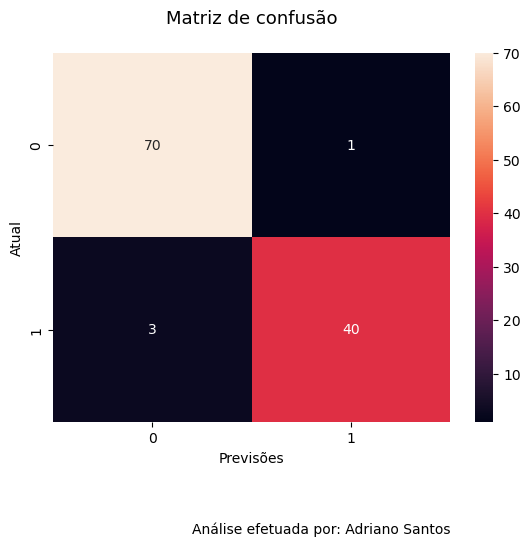

In [77]:
conf_mat_1 = confusion_matrix(y_test, predition_1)

sns.heatmap(conf_mat_1, annot=True)
plt.title('Matriz de confusão\n', fontsize=13)
plt.ylabel('Atual')
plt.xlabel('Previsões')
plt.annotate('Análise efetuada por: Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=10)

plt.show()

### 6.6. <strong>Model Logistic Regression</strong>

**LogisticRegression** é um algoritmo de aprendizado de máquina de **classificação binária**, que significa que ele é usado para prever a probabilidade de um evento pertencer a uma de duas classes. É um dos algoritmos mais simples e populares para classificação, e é muito utilizado em diversas áreas, como:

* **Diagnóstico de doenças:** Prever a probabilidade de um paciente ter uma doença com base em seus sintomas.
* **Análise de crédito:** Prever a probabilidade de um cliente inadimplir um empréstimo.
* **Marketing:** Prever a probabilidade de um cliente clicar em um anúncio.
* **Detecção de fraude:** Identificar transações fraudulentas.

**Como funciona o LogisticRegression?**

O LogisticRegression funciona da seguinte maneira:

1. **Treinamento:** O algoritmo é treinado em um conjunto de dados com exemplos rotulados, ou seja, com exemplos que já se sabe a qual classe pertencem.
2. **Cálculo da probabilidade:** O algoritmo calcula a probabilidade de um novo exemplo pertencer a cada uma das classes.
3. **Previsão:** O algoritmo classifica o novo exemplo na classe com a maior probabilidade.

**Vantagens do LogisticRegression:**

* **Simples de entender:** O algoritmo é relativamente simples de entender e interpretar.
* **Eficiente:** O treinamento do LogisticRegression é geralmente rápido e eficiente.
* **Robusto:** O algoritmo é robusto a outliers e ruído nos dados.
* **Versátil:** O algoritmo pode ser aplicado a diversos tipos de problemas de classificação binária.

**Desvantagens do LogisticRegression:**

* **Limitação a duas classes:** O LogisticRegression só pode ser usado para problemas de classificação binária.
* **Overfitting:** O algoritmo pode sofrer de overfitting se não for ajustado corretamente.
* **Interpretabilidade:** A interpretabilidade do modelo pode ser limitada, especialmente para modelos com muitos parâmetros.

### 6.7. <strong>Criando modelo de classificação `LogisticRegression`</strong>

No código a seguir, está sendo utilizado um modelo de regressão logística por meio da biblioteca **LogisticRegression** do Python. A função **`fit`** está sendo empregada para ajustar o modelo aos dados de treinamento, onde **x_train** representa as features e **y_train** os rótulos correspondentes. Essa função permite que o modelo aprenda os padrões presentes nos dados de treinamento, ajustando os parâmetros do modelo para minimizar a diferença entre as previsões e os valores reais. Essa etapa é crucial no processo de construção de modelos de machine learning, pois é durante o treinamento que o modelo adquire a capacidade de generalizar para novos dados, tornando-se capaz de fazer previsões precisas em dados não vistos anteriormente.

In [78]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(x_train, y_train)

LogisticRegression()

### 6.8. <strong>Criando uma predição com o modelo previamente treinado</strong>

No código a seguir, está sendo feita uma previsão utilizando um modelo de regressão logística previamente treinado. A variável **predition_2** recebe as previsões do modelo para os dados de teste **x_test**, utilizando a função **`predict`** do objeto **model_logistic**. Em seguida, é impresso um relatório de classificação utilizando a função **`classification_report`**, comparando as previsões **predition_2** com os valores reais **y_test**. Esse relatório fornece métricas como precisão, recall e F1-score para cada classe, permitindo avaliar o desempenho do modelo na classificação dos dados de teste.

In [79]:
predition_2 = model_LogisticRegression.predict(x_test)
print(classification_report(y_test, predition_2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



No código a seguir, está sendo calculada a acurácia de um modelo de regressão logística utilizando a biblioteca **accuracy_score** do scikit-learn. A função **`accuracy_score`** compara as previsões feitas pelo modelo (**predition_2**) com os valores reais (**y_test**) do conjunto de teste, retornando a proporção de previsões corretas. O resultado é então formatado como uma porcentagem com duas casas decimais e impresso na tela, fornecendo uma medida da precisão do modelo.

In [80]:
model_logistict_acc = accuracy_score(y_test, predition_2)
print("Accuracy do modelo é: {:.2%}".format(model_logistict_acc))

Accuracy do modelo é: 96.49%


### 6.9. <strong>Calculando e plotando a matriz de confusão</strong>

No código a seguir, está sendo utilizada a função **`confusion_matrix`** da biblioteca **sklearn.metrics** para criar uma matriz de confusão com as previsões (**prediction_2**) e os valores reais (**y_test**). Em seguida, a biblioteca **seaborn** é usada para plotar um mapa de calor (**heatmap**) da matriz de confusão, com as células anotadas com os valores reais e previstos. Além disso, o título do gráfico é definido como 'Matriz de confusão', enquanto os rótulos dos eixos x e y são configurados como 'Previsões' e 'Atual', respectivamente. Por fim, uma anotação é adicionada ao gráfico indicando a análise realizada por '@Adriano Santos'.

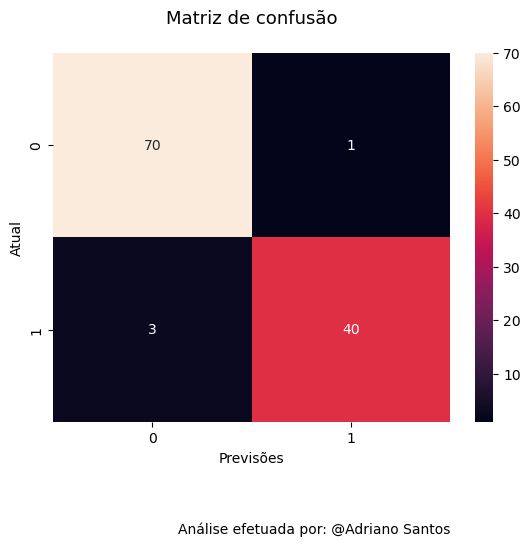

In [84]:
conf_mat_2 = confusion_matrix(y_test, predition_2)

sns.heatmap(conf_mat_2, annot=True)
plt.title('Matriz de confusão\n', fontsize=13)
plt.xlabel('Previsões')
plt.ylabel('Atual')
plt.annotate('Análise efetuada por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=10)
plt.show()

### 6.10. <strong>Model Support Vector Classifier (SVC)</strong>

**1. Support Vector Classifier (SVC)**

Em aprendizado de máquina, SVC é um algoritmo de classificação binária que utiliza vetores de suporte para separar as classes. É um dos algoritmos mais populares para classificação binária, e é muito utilizado em diversas áreas, como:

* **Diagnóstico de doenças:** Prever a probabilidade de um paciente ter uma doença com base em seus sintomas.
* **Análise de crédito:** Prever a probabilidade de um cliente inadimplir um empréstimo.
* **Marketing:** Prever a probabilidade de um cliente clicar em um anúncio.
* **Detecção de fraude:** Identificar transações fraudulentas.

**Como funciona o SVC?**

O SVC funciona da seguinte maneira:

1. **Treinamento:** O algoritmo é treinado em um conjunto de dados com exemplos rotulados, ou seja, com exemplos que já se sabe a qual classe pertencem.
2. **Cálculo do hiperplano:** O algoritmo calcula um hiperplano que separa as duas classes de forma que a margem entre as classes seja a maior possível.
3. **Previsão:** O algoritmo classifica o novo exemplo na classe que está do mesmo lado do hiperplano que a maioria dos exemplos da classe.

**Vantagens do SVC:**

* **Alta acurácia:** O SVC geralmente obtém alta acurácia em problemas de classificação binária.
* **Robustez:** O algoritmo é robusto a outliers e ruído nos dados.
* **Interpretabilidade:** O hiperplano pode ser interpretado para entender como o modelo faz suas previsões.
* **Versatilidade:** O algoritmo pode ser aplicado a diversos tipos de problemas de classificação binária.

**Desvantagens do SVC:**

* **Complexidade:** O treinamento do SVC pode ser computacionalmente caro, especialmente para conjuntos de dados grandes.
* **Overfitting:** O algoritmo pode sofrer de overfitting se não for ajustado corretamente.
* **Interpretabilidade:** A interpretabilidade do modelo pode ser limitada, especialmente para modelos com muitos parâmetros.

### 6.11. <strong>Criando modelo de classificação `SVC`</strong>

No código a seguir, está sendo utilizado o algoritmo de Support Vector Classifier (SVC) com um kernel radial (rbf). A função **`SVC`** é uma implementação de máquinas de vetores de suporte para classificação e utiliza o kernel especificado para transformar os dados de entrada em um espaço de maior dimensionalidade, onde a separação das classes é realizada. Os dados de treinamento, representados por **x_train** e **y_train**, são então ajustados ao modelo SVC por meio do método **`fit`**, onde **x_train** são as características das amostras de treinamento e **y_train** são as classes alvo correspondentes. Essencialmente, esse trecho de código cria e treina um modelo de classificação SVC com um kernel radial.

In [85]:
model_SVC = SVC(kernel="rbf")
model_SVC.fit(x_train, y_train)

SVC()

### 6.12. <strong>Criando uma predição com o modelo previamente treinado</strong>

In [86]:
predictions_3 = model_SVC.predict(x_test)
print(classification_report(y_test, predictions_3))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



No código a seguir, está sendo calculada a precisão de um modelo de Support Vector Classifier (SVC). A variável **svc_model_acc** armazena a precisão do modelo, que é calculada usando a função **`accuracy_score`**, da biblioteca **sklearn.metrics**, comparando as previsões (**predictions_3**) com os valores reais do conjunto de teste (**y_test**). Em seguida, a precisão é impressa na tela utilizando a função **`print`**, onde o valor é formatado para exibir a porcentagem com duas casas decimais, proporcionando uma medida clara da acurácia do modelo.

In [87]:
svc_model_acc = accuracy_score(y_test, predictions_3)
print("Accuracy do modelo é: {:.2%}".format(svc_model_acc))

Accuracy do modelo é: 94.74%


### 6.13. <strong>Calculando e plotando a matriz de confusão</strong>

No código a seguir, está sendo utilizada a função **`confusion_matrix`** da biblioteca **sklearn.metrics** para criar uma matriz de confusão com as previsões (**prediction_3**) e os valores reais (**y_test**). Em seguida, a biblioteca **seaborn** é usada para plotar um mapa de calor (**heatmap**) da matriz de confusão, com as células anotadas com os valores reais e previstos. Além disso, o título do gráfico é definido como 'Matriz de confusão', enquanto os rótulos dos eixos x e y são configurados como '`Previsões`' e '`Atual`', respectivamente. Por fim, uma anotação é adicionada ao gráfico indicando a análise realizada por '@Adriano Santos'.

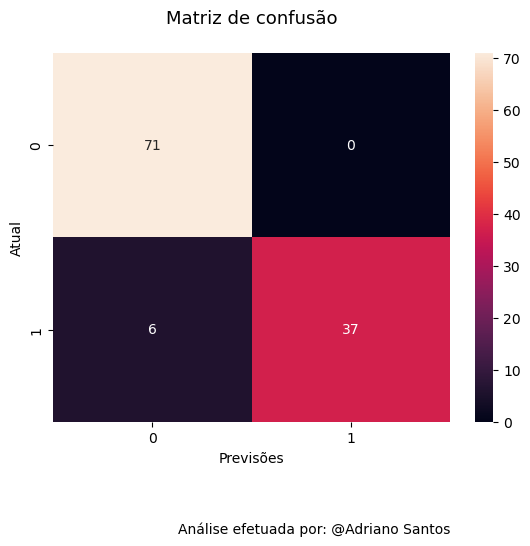

In [88]:
conf_mat_3 = confusion_matrix(y_test, predictions_3)

sns.heatmap(conf_mat_3, annot=True)
plt.xlabel('Previsões')
plt.ylabel('Atual')
plt.title('Matriz de confusão\n', fontsize=13)
plt.annotate('Análise efetuada por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=10)
plt.show()

### 6.14. <strong>Visualizando o gráfico de desempenho de diferentes modelos</strong>

No código a seguir, está sendo criado um gráfico de barras utilizando a biblioteca **matplotlib** em Python. Um gráfico é gerado com o tamanho de 12 por 6 polegadas, representando o desempenho de diferentes modelos de aprendizado de máquina. Os valores de acurácia dos modelos, armazenados na lista **model_acc**, são plotados no eixo x, enquanto os nomes dos modelos, contidos na lista **model_name**, são plotados no eixo y. A paleta de cores utilizada é 'magma'. O título do gráfico é definido como "Gráfico de Desempenho dos Modelos Criados" com negrito e tamanho de fonte 16. Além disso, uma anotação é adicionada no canto inferior direito do gráfico, indicando a autoria da análise. O gráfico é então exibido.

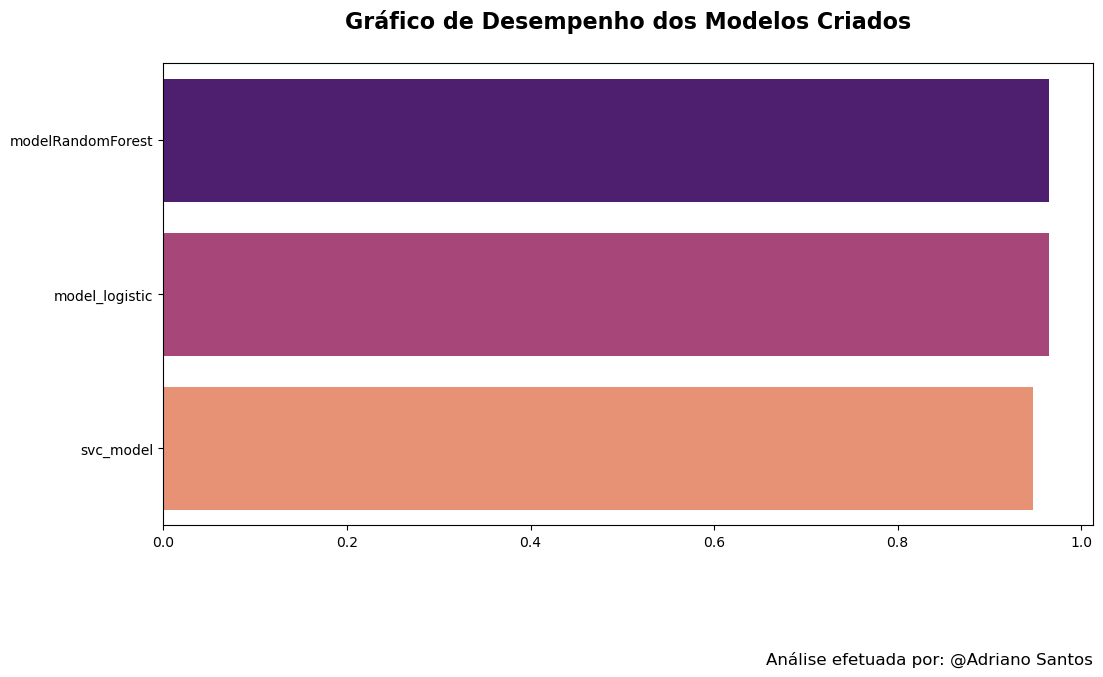

In [89]:
plt.figure(figsize=(12,6))
model_acc = [model_RandomForest_acc, model_logistict_acc, svc_model_acc]
model_name = ['modelRandomForest', 'model_logistic', 'svc_model']
sns.barplot(x= model_acc, y=model_name, palette='magma')
plt.title("Gráfico de Desempenho dos Modelos Criados\n", fontweight = "bold", fontsize=16)
plt.annotate('Análise efetuada por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)

plt.show()